In [ ]:
# Local
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry')

# Colab
!pip install koreanize-matplotlib
import koreanize_matplotlib
import matplotlib.pyplot as plt

Unknown system... sorry
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount("/content/drive")
# %cd /content/drive/MyDrive/practice/실습/고급반/4차시
%cd /content/drive/MyDrive/practice/실습/데이터

Mounted at /content/drive
/content/drive/MyDrive/practice/실습/데이터


## 머신러닝 입문

In [ ]:
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 데이터셋

In [ ]:
iris_df = sns.load_dataset('iris')

In [ ]:
iris_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
# 열 이름 확인
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# 데이터 타입 확인
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
# 데이터 값 확인 ==> 분류 / 군집화
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


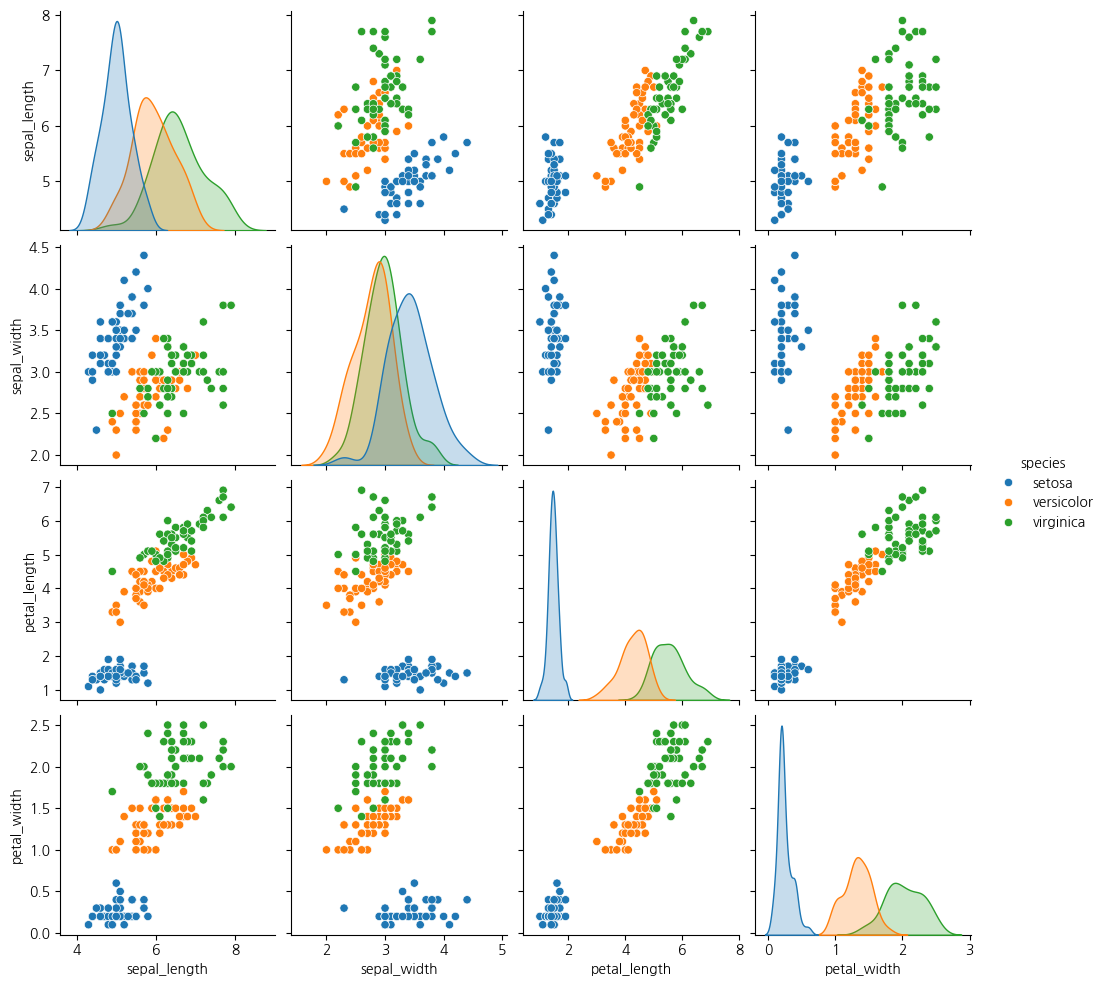

In [ ]:
sns.pairplot(iris_df, hue='species')

### 학습-테스트 데이터 분리

In [ ]:
x_data = iris_df.drop('species', axis=1)
y_data = iris_df['species']

In [ ]:
print(x_data.head(1))
print("-" * 50)
print(y_data.head(1))

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
--------------------------------------------------
0    setosa
Name: species, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split

# x_data: 데이터의 특징
# y_data: 예측하고자 하는 값
# test_size: 테스트 데이터의 비율
# random_state: 시드 값 (시드를 고정하지 않을 경우, 매번 다른 값이 출력)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size =0.2, random_state=42)

In [ ]:
print(f"학습 데이터의 개수: {len(x_train)}")
print(f"테스트 데이터의 개수: {len(x_test)}")

학습 데이터의 개수: 120
테스트 데이터의 개수: 30


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=42)

In [ ]:
# 시드 테스트
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_data, y_data, test_size=0.25)

In [ ]:
# 데이터의 순서가 다르게 위치한다는 것을 알 수 있다.
x_train.index == x_train_1.index

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [ ]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_data, y_data, test_size=0.25, random_state=42)
x_train.index == x_train_1.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

### 모델 학습 및 예측

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [ ]:
predictions = model.predict(x_test)
predictions

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa'], dtype=object)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
predictions = knn.predict(x_test)
predictions

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa'], dtype=object)

In [ ]:
knn.score(x_test, y_test)

1.0

### 다양한 형태의 데이터 분석 및 전처리

In [ ]:
import pandas as pd
# %cd /content/drive/MyDrive/practice/실습/데이터
df = pd.read_csv("../내용/user_personalized_features.csv", index_col="Unnamed: 0")
df.head()

,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True
1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False
2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True
3,#4,60,Female,Suburban,71612,Fashion,18,3,163,4377,Apparel,527,29,False
4,#5,25,Male,Suburban,49725,Travel,2,5,141,4502,Health & Beauty,53,10,True


In [ ]:
x_data = df[['Age', 'Income', 'Last_Login_Days_Ago', 'Purchase_Frequency', 'Average_Order_Value',
         'Total_Spending', 'Time_Spent_on_Site_Minutes', 'Pages_Viewed']]
y_data = df[['Newsletter_Subscription']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
print(f"학습 데이터의 개수: {len(x_train)}")
print(f"테스트 데이터의 개수: {len(x_test)}")

학습 데이터의 개수: 800
테스트 데이터의 개수: 200


In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.495


In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.47

#### object 타입 데이터 수치로 변환


In [ ]:
df['Interests'].unique()

array([2, 3, 0, 4, 1])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the encoder on the categorical columns
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Location'] = encoder.fit_transform(df['Location'])
df['Interests'] = encoder.fit_transform(df['Interests'])
df['Product_Category_Preference'] = encoder.fit_transform(df['Product_Category_Preference'])

In [ ]:
df.head(3)

,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription
0,#1,56,1,1,38037,2,5,7,18,2546,1,584,38,True
1,#2,46,0,0,103986,3,15,7,118,320,2,432,40,False
2,#3,32,0,1,101942,2,28,1,146,3766,0,306,1,True


In [ ]:
df.dtypes

User_ID                        object
Age                             int64
Gender                          int64
Location                        int64
Income                          int64
Interests                       int64
Last_Login_Days_Ago             int64
Purchase_Frequency              int64
Average_Order_Value             int64
Total_Spending                  int64
Product_Category_Preference     int64
Time_Spent_on_Site_Minutes      int64
Pages_Viewed                    int64
Newsletter_Subscription          bool
dtype: object

In [ ]:
x_data = df[['Age', 'Gender', 'Location', 'Income', 'Interests',
             'Last_Login_Days_Ago', 'Purchase_Frequency', 'Average_Order_Value',
             'Total_Spending', 'Product_Category_Preference',
             'Time_Spent_on_Site_Minutes', 'Pages_Viewed']]
y_data = df[['Newsletter_Subscription']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size =0.2, random_state=42)
print(f"학습 데이터의 개수: {len(x_train)}")
print(f"테스트 데이터의 개수: {len(x_test)}")

학습 데이터의 개수: 800
테스트 데이터의 개수: 200


In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5


In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.47

#### Feature Scaling
서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링(feature scaling)이라고 합니다. 대표적인 방법으로 표준화(Standardization) 와 정규화(Normalization) 이 있습니다.

표준화(Standardizaion)
표준화란 데이터의 피쳐 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것을 의미합니다.

정규화(Normalization)
정규화는 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념입니다.
```예를 들어 피처 A는 거리로서 0~100km 데이터이고, 피처 B는 금액으로서 0~100,000,000₩ 단위라면, 이 둘을 비교할 수 있는 수준의 단위로 만들어줘야 할 것입니다. 이를 정규화를 통해 진행합니다.```

In [ ]:
# 수치 데이터에 대한 Feature Scaling 수행
df_copy = df[['Age', 'Income', 'Last_Login_Days_Ago', 'Purchase_Frequency', 'Average_Order_Value',
         'Total_Spending', 'Time_Spent_on_Site_Minutes', 'Pages_Viewed']]

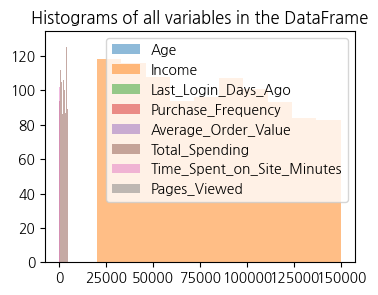

In [ ]:
import matplotlib.pyplot as plt

# Create a list of column names
column_names = list(df_copy.columns)

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(4, 3))

# Iterate through each column and plot its histogram
for i, column_name in enumerate(column_names):
    ax.hist(df[column_name], bins=10, alpha=0.5, label=column_name)

# Add a legend and title
ax.legend()
ax.set_title("Histograms of all variables in the DataFrame")

# Show the plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data in df
scaler.fit(df_copy)

# Transform the data and store it in df_normalized
df_normalized = scaler.transform(df_copy)

# Convert the numpy array back to a DataFrame
df_normalized = pd.DataFrame(df_normalized, columns=column_names)
df_normalized.head()

,Age,Income,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Time_Spent_on_Site_Minutes,Pages_Viewed
0,1.112882,-1.158586,-1.290739,0.835231,-1.568734,-0.004898,1.633199,0.970302
1,0.371652,0.607340,-0.071450,0.835231,0.254549,-1.572201,0.767143,1.113025
2,-0.666069,0.552607,1.513626,-1.280170,0.765068,0.854091,0.049228,-1.670073
3,1.409373,-0.259544,0.294336,-0.575036,1.075026,1.284289,1.308428,0.328049
4,-1.184929,-0.845615,-1.656526,0.130097,0.673904,1.372300,-1.392299,-1.027820


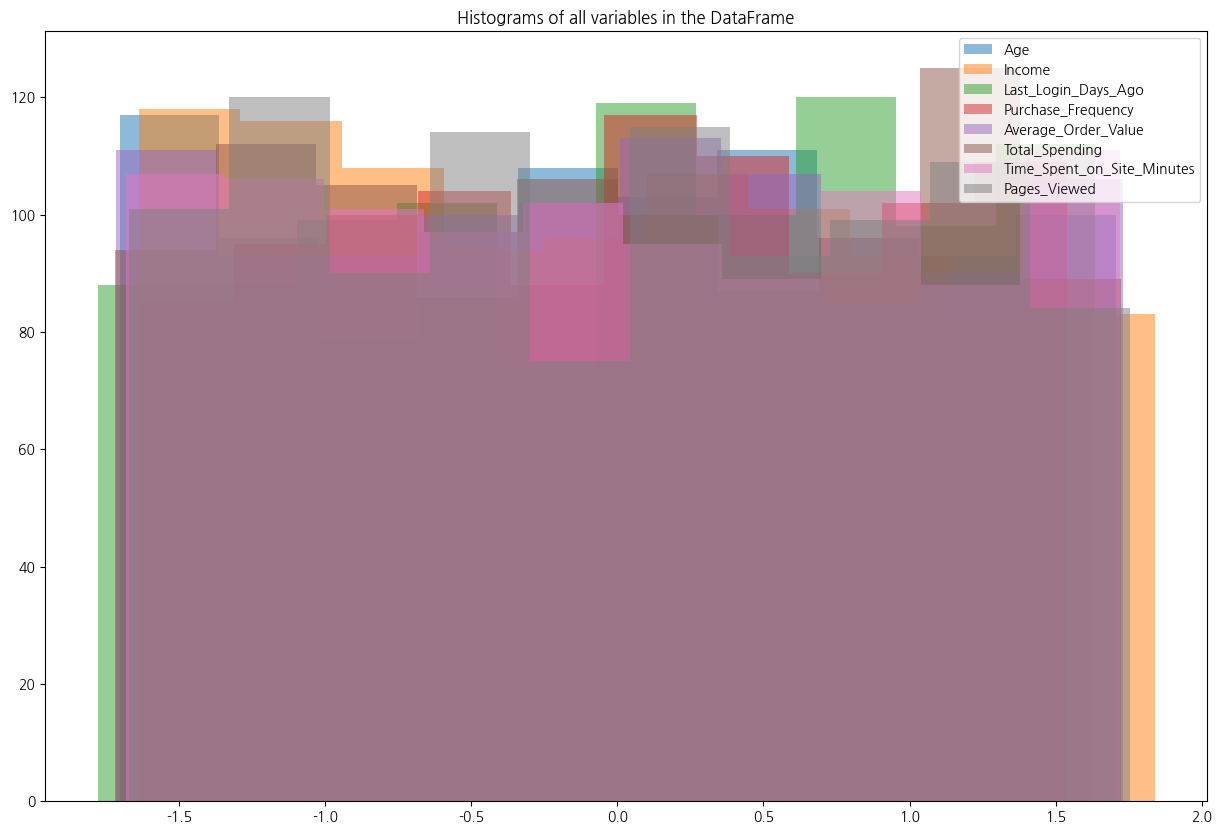

In [ ]:
import matplotlib.pyplot as plt

# Create a list of column names
column_names = list(df_normalized.columns)

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(15, 10))

# Iterate through each column and plot its histogram
for i, column_name in enumerate(column_names):
    ax.hist(df_normalized[column_name], bins=10, alpha=0.5, label=column_name)

# Add a legend and title
ax.legend()
ax.set_title("Histograms of all variables in the DataFrame")

# Show the plot
plt.show()


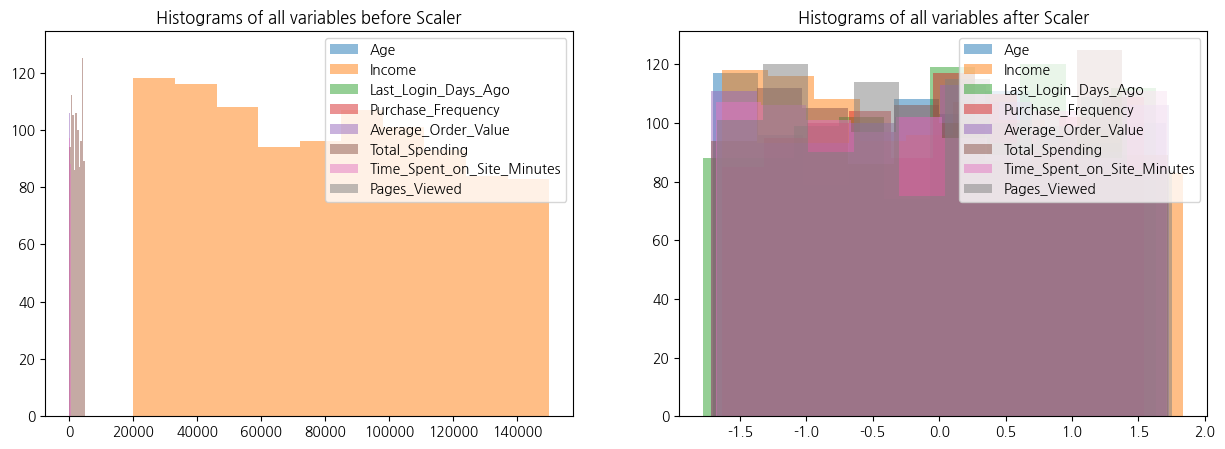

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the histograms of the original data on the first subplot
for i, column_name in enumerate(column_names):
    ax1.hist(df[column_name], bins=10, alpha=0.5, label=column_name)

# Add a legend and title to the first subplot
ax1.legend()
ax1.set_title("Histograms of all variables before Scaler")

# Plot the histograms of the normalized data on the second subplot
for i, column_name in enumerate(column_names):
    ax2.hist(df_normalized[column_name], bins=10, alpha=0.5, label=column_name)

# Add a legend and title to the second subplot
ax2.legend()
ax2.set_title("Histograms of all variables after Scaler")

# Show the plot
plt.show()

In [ ]:
df_normalized

,Age,Income,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Time_Spent_on_Site_Minutes,Pages_Viewed
0,1.112882,-1.158586,-1.290739,0.835231,-1.568734,-0.004898,1.633199,0.970302
1,0.371652,0.607340,-0.071450,0.835231,0.254549,-1.572201,0.767143,1.113025
2,-0.666069,0.552607,1.513626,-1.280170,0.765068,0.854091,0.049228,-1.670073
3,1.409373,-0.259544,0.294336,-0.575036,1.075026,1.284289,1.308428,0.328049
4,-1.184929,-0.845615,-1.656526,0.130097,0.673904,1.372300,-1.392299,-1.027820
...,...,...,...,...,...,...,...,...
995,-1.407298,0.612052,0.294336,0.835231,-0.383600,-1.370128,1.393894,-0.242843
996,-0.073085,0.473909,0.050479,-0.575036,1.384984,-1.494047,0.351208,-1.455989
997,-1.036683,-0.238577,-0.924953,1.187797,0.473342,-1.339852,0.191672,0.684856
998,1.483496,-0.576960,-1.778455,-0.575036,0.874465,-1.064553,0.738655,0.256687


In [ ]:
normalized_df = df.copy()

normalized_df['Age'] = df_normalized['Age']
normalized_df['Income'] = df_normalized['Income']
normalized_df['Last_Login_Days_Ago'] = df_normalized['Last_Login_Days_Ago']
normalized_df['Purchase_Frequency'] = df_normalized['Purchase_Frequency']
normalized_df['Average_Order_Value'] = df_normalized['Average_Order_Value']
normalized_df['Total_Spending'] = df_normalized['Total_Spending']
normalized_df['Time_Spent_on_Site_Minutes'] = df_normalized['Time_Spent_on_Site_Minutes']
normalized_df['Pages_Viewed'] = df_normalized['Pages_Viewed']

In [ ]:
x_data = normalized_df[['Age', 'Gender', 'Location', 'Income', 'Interests',
             'Last_Login_Days_Ago', 'Purchase_Frequency', 'Average_Order_Value',
             'Total_Spending', 'Product_Category_Preference',
             'Time_Spent_on_Site_Minutes', 'Pages_Viewed']]
y_data = normalized_df[['Newsletter_Subscription']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size =0.2, random_state=42)
print(f"학습 데이터의 개수: {len(x_train)}")
print(f"테스트 데이터의 개수: {len(x_test)}")

학습 데이터의 개수: 800
테스트 데이터의 개수: 200


In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.485


In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.545

In [ ]:
normalized_df = df.copy()
normalized_df['Income'] = df_normalized['Income']

In [ ]:
x_data = normalized_df[['Age', 'Gender', 'Location', 'Income', 'Interests',
             'Last_Login_Days_Ago', 'Purchase_Frequency', 'Average_Order_Value',
             'Total_Spending', 'Product_Category_Preference',
             'Time_Spent_on_Site_Minutes', 'Pages_Viewed']]
y_data = normalized_df[['Newsletter_Subscription']]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size =0.2, random_state=42)
print(f"학습 데이터의 개수: {len(x_train)}")
print(f"테스트 데이터의 개수: {len(x_test)}")

학습 데이터의 개수: 800
테스트 데이터의 개수: 200


In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.475


In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.505

In [ ]:
x_data = normalized_df[['Age', 'Gender', 'Location', 'Income', 'Interests',
             'Last_Login_Days_Ago', 'Purchase_Frequency', 'Average_Order_Value',
             'Total_Spending', 'Product_Category_Preference',
             'Time_Spent_on_Site_Minutes', 'Pages_Viewed']]
y_data = normalized_df[['Newsletter_Subscription']]

In [ ]:
sns.pairplot(normalized_df, hue='Newsletter_Subscription')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
x_data = normalized_df[['Gender', 'Location', 'Interests',
                        'Purchase_Frequency', 'Product_Category_Preference',
                        'Pages_Viewed', 'Newsletter_Subscription']]
sns.pairplot(x_data, hue='Newsletter_Subscription')

In [ ]:
x_data = normalized_df[['Gender', 'Location', 'Interests',
                        'Purchase_Frequency', 'Product_Category_Preference', 'Pages_Viewed']]
y_data = normalized_df[['Newsletter_Subscription']]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size =0.2, random_state=42)
print(f"학습 데이터의 개수: {len(x_train)}")
print(f"테스트 데이터의 개수: {len(x_test)}")

학습 데이터의 개수: 800
테스트 데이터의 개수: 200


In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.485


In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.48